# **Customer personality analysis**

In this project, We will cluster customer data from a grocery store to identify distinct groups with similar behaviors. 
This segmentation will help tailor products and services to specific customer needs, increasing customer satisfaction and business value.

In [42]:
# Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [43]:
df = pd.read_csv('marketing_campaign.csv')

In [44]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## **1. Data Preprocessing(Feature Engineering, Data Cleaning and Exploritary Data Analysis)**

In [45]:
df.shape

(2240, 29)

In [46]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [47]:
# check number of unique values for each feature
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

> It can be observed that the values Z_CostContact and Z_Revenue are the same for every datapoint. Therefore We will drop them.

In [48]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [49]:
# Check if there are any null values for any feature
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

> We can see that income has some NUll values, 24 to be exact as seen earlier in df.info().
> 
> We replace all those NULL income values with the mean of income feature.

In [50]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [51]:
# Converting Dt_Customer to date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', errors='coerce')

In [52]:
df.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


In [53]:
print('Year of Birth mean: ', df['Year_Birth'].mean())
print('Maximum age: ', pd.Timestamp.today().year - df['Year_Birth'].min())
print('Unique years of customer registrations : ', df['Dt_Customer'].dt.year.unique())

Year of Birth mean:  1968.8058035714287
Maximum age:  132
Unique years of customer registrations :  [2012 2014 2013]


> Since the data is old and seems to be gathered from years 2015/16, We consider 2016 to be the present date.

In [54]:
reference_year = pd.Timestamp(year=2015, month=12, day=31)

In [55]:
#Calculate the number of months a customer has been with the company
df['Months_Since_Registration'] = ((reference_year - df['Dt_Customer']).dt.days / 30).round().astype(int)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Months_Since_Registration
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,45
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,17
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,29
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,15
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,24
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,10,6,0,0,0,0,0,0,0,28
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,7,6,0,0,0,0,0,0,0,38
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,4,8,0,0,0,0,0,0,0,29
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,2,9,0,0,0,0,0,0,1,31
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,20,1,0,0,0,0,0,0,22


In [56]:
# Use the year of birth to calculate age
df['Age'] = reference_year.year - df['Year_Birth']  # Client Age
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Months_Since_Registration,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,45,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,17,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,29,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,15,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,24,34


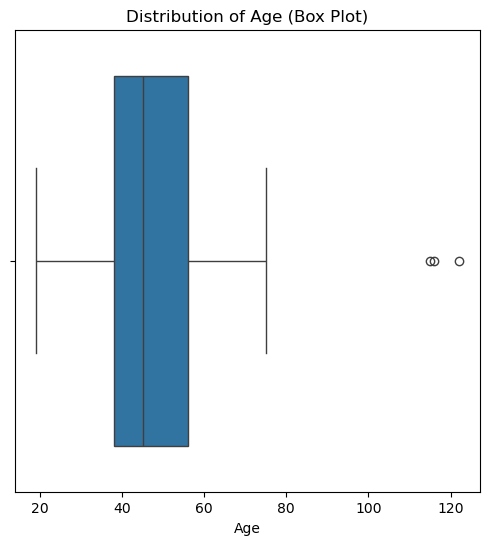

In [57]:
# Box plot to see the distribution of age
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age (Box Plot)')
plt.show()

In [58]:
num_elderly = len(df[df['Age'] > 90])
print(f"Number of people older than 80: {num_elderly}")

Number of people older than 80: 3


> Since only three datapoints are far from the normal range, we drop them to avoid complexities and potential biases/

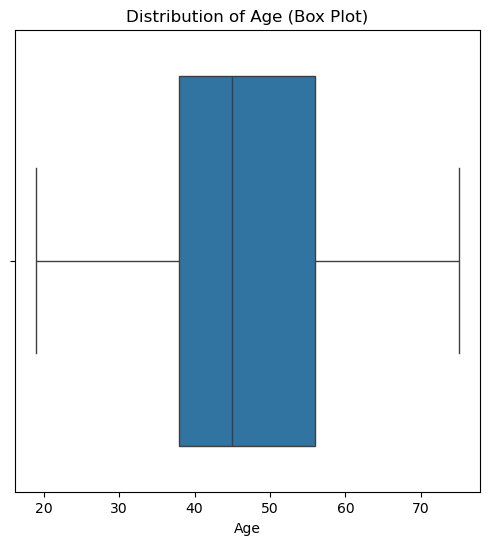

In [59]:
df.drop(df[df['Age'] > 90].index, inplace=True)

plt.figure(figsize=(6, 6)) 
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age (Box Plot)')
plt.show()

In [60]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

> Encoding education in order provide a more nuanced representation of the data when there's a clear hierarchical relationship between the education levels and it correlates with other significant features.

In [61]:
df["Education"] = df["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Months_Since_Registration,Age
0,5524,1957,1,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,45,58
1,2174,1954,1,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,17,61
2,4141,1965,1,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,29,50
3,6182,1984,1,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,15,31
4,5324,1981,3,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,24,34


In [62]:
# Adding "Total Spent" which is the sum of all the spendings of the customer
df["TotalSpent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [63]:
# Adding "TotalAcceptedCmp" which is the sum of all offers accepted by the customer in all campaigns
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [64]:
# Adding "NumTotalPurchases" which is the sum of all the purchases made by the customer in all forms.
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [65]:
# Adding "Children" which is the total amount of children the customer has(kids _ teens)
df['Children'] = df['Kidhome'] + df['Teenhome']

In [66]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [67]:
df = df[-df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Name: count, dtype: int64

In [68]:
from sklearn.preprocessing import OneHotEncoder

df["Marital_Status"] = df["Marital_Status"].replace({
    "Married": 0,
    "Together": 1,
    "Single": 2,
    "Divorced": 3,
    "Widow": 4
})


In [69]:
df["Complain"].value_counts()

Complain
0    2210
1      20
Name: count, dtype: int64

> - The Complain column, with only 20 complaints out of 2230 datapoints, represents a highly imbalanced feature.
> -  The extremely low number of complaints compared to non-complaints makes it unlikely to be very informative for clustering. The small number of complaints would likely not create a meaningful cluster, and including it could add noise.


In [70]:
# Now that we have extracted the features that are important to us, we can drop many columns to reduce the dimensionality of the dataset.
df_copy = df.copy()

col_drop = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response", # used them to create TotalAcceptedCmp
           "NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "NumDealsPurchases", # used them to create NumTotalPurchases
           "Kidhome", "Teenhome", # used them to create children
           "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", # used them to create TotalSpent
           "Year_Birth","Dt_Customer", # used to obtain Age and Months_Since_Registration
           "Complain",
           "ID" # irrelevant for clustering
           ] 
df=df.drop(columns=col_drop,axis=1)

In [71]:
df.head(5)

,Education,Marital_Status,Income,Recency,Months_Since_Registration,Age,TotalSpent,TotalAcceptedCmp,TotalPurchases,Children
0,1,2,58138.0,58,45,58,1617,1,25,0
1,1,2,46344.0,38,17,61,27,0,6,2
2,1,1,71613.0,26,29,50,776,0,21,0
3,1,1,26646.0,26,15,31,53,0,8,1
4,3,0,58293.0,94,24,34,422,0,19,1


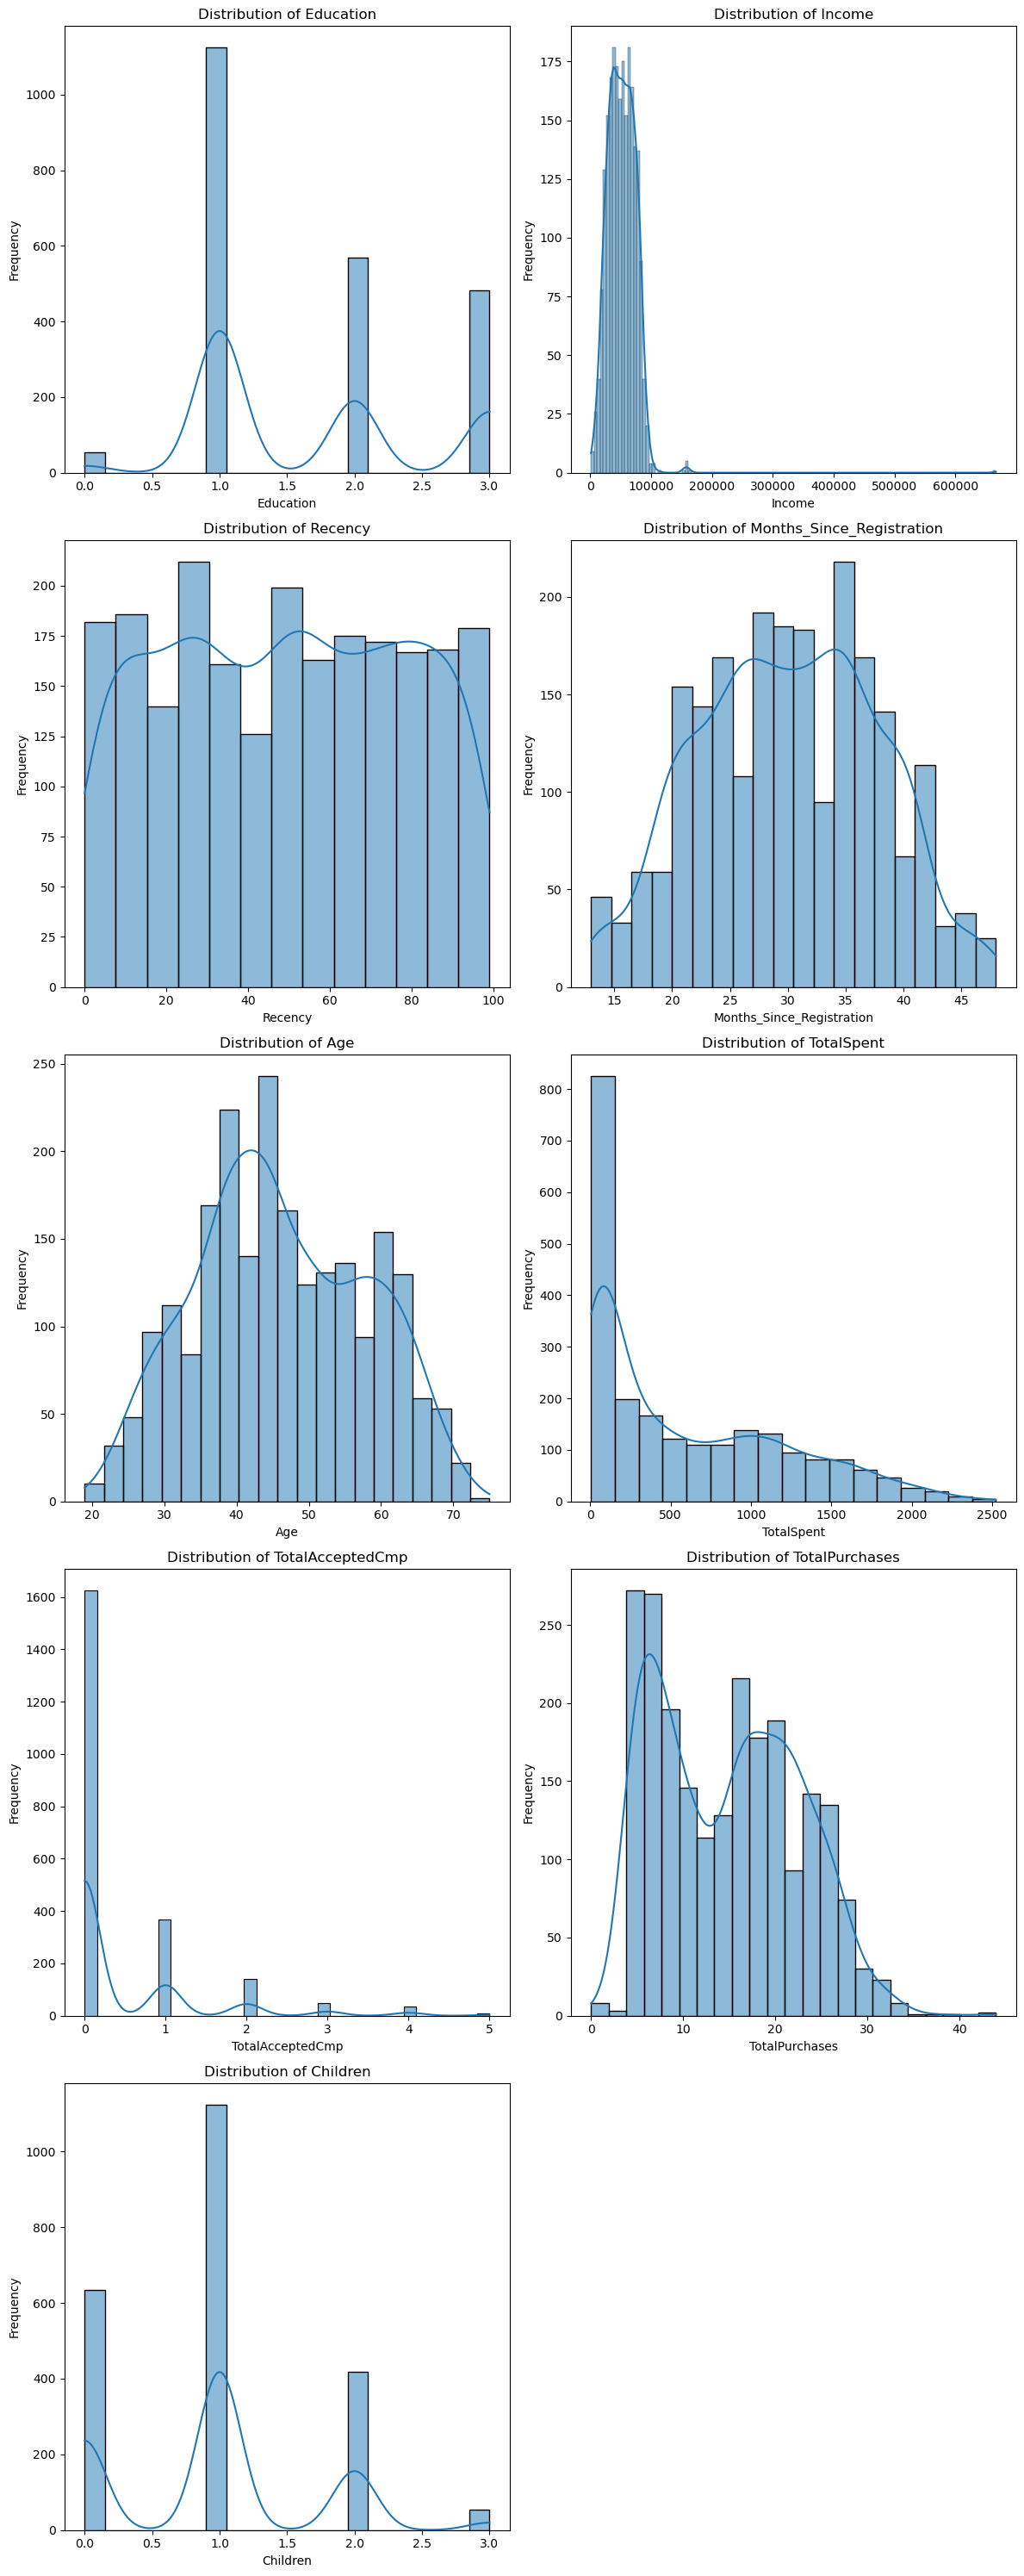

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Education', 'Income', 'Recency', 'Months_Since_Registration', 'Age', 'TotalSpent', 'TotalAcceptedCmp', 'TotalPurchases', 'Children']

num_plots = len(numerical_features)
num_cols = 2 
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))  # Adjust figure size accordingly

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


> To better understand each feature distribuation and find outliers, we can use box plot.

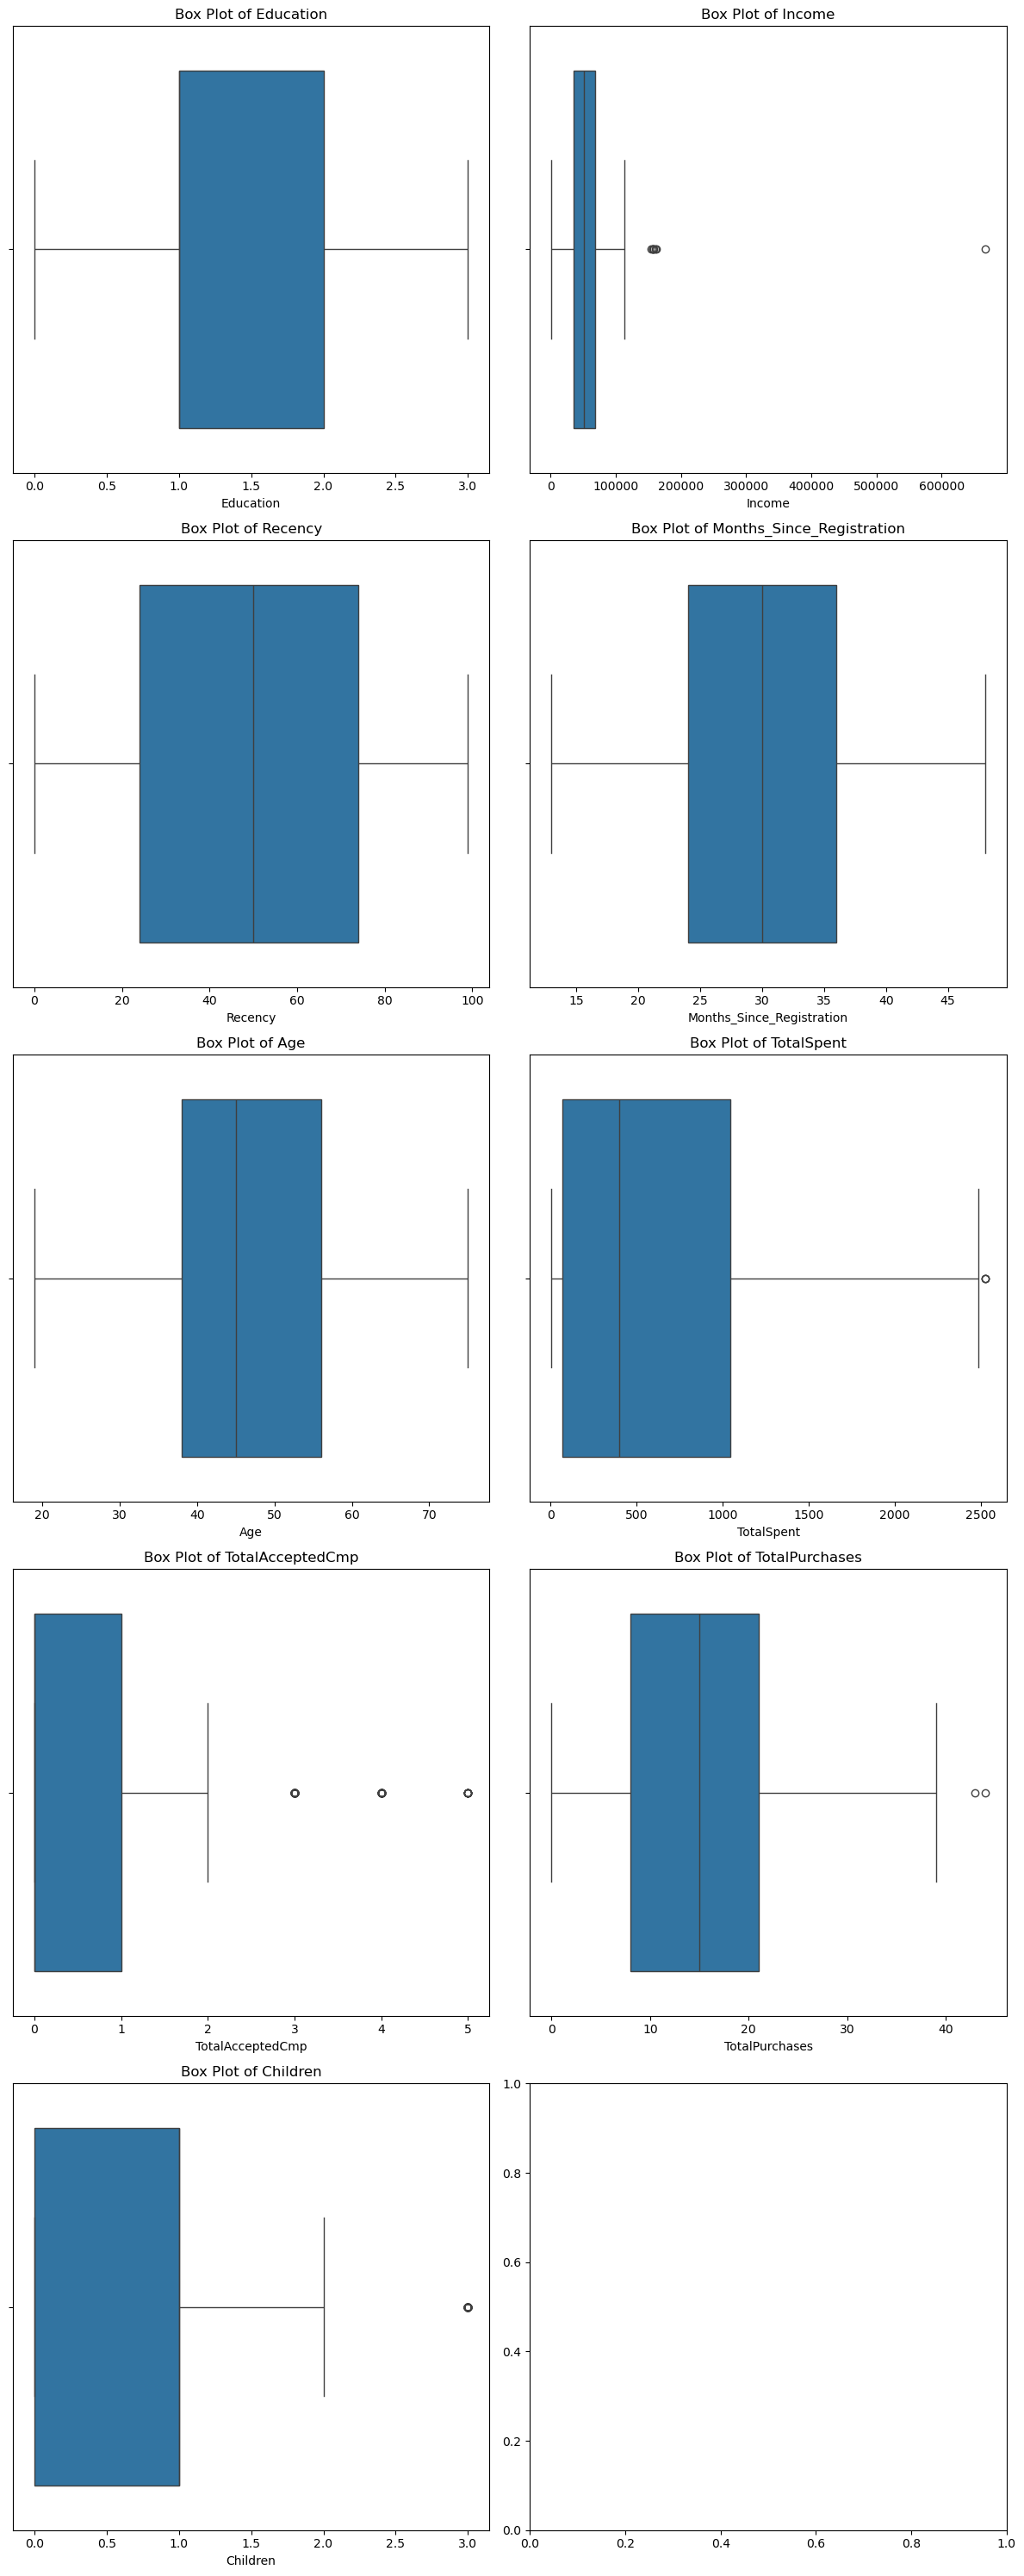

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Education', 'Income', 'Recency', 'Months_Since_Registration', 'Age', 'TotalSpent', 'TotalAcceptedCmp', 'TotalPurchases', 'Children']

num_plots = len(numerical_features)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows)) #Reduced height here.

for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [74]:
len(df[df["Income"] > 120000])


8

In [75]:
df.drop(df[df['Income'] > 120000].index, inplace=True)


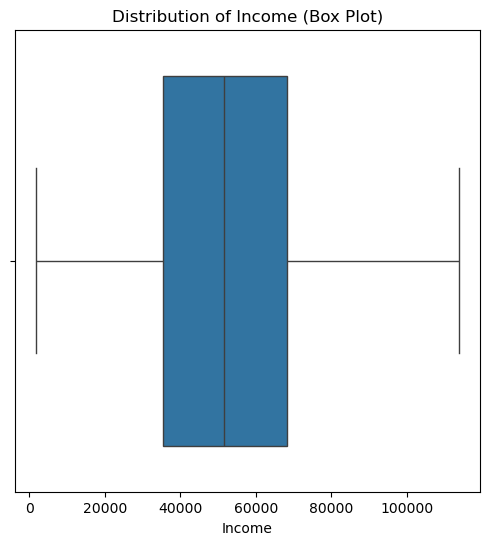

In [76]:
plt.figure(figsize=(6, 6)) 
sns.boxplot(x=df['Income'])
plt.title('Distribution of Income (Box Plot)')
plt.show()

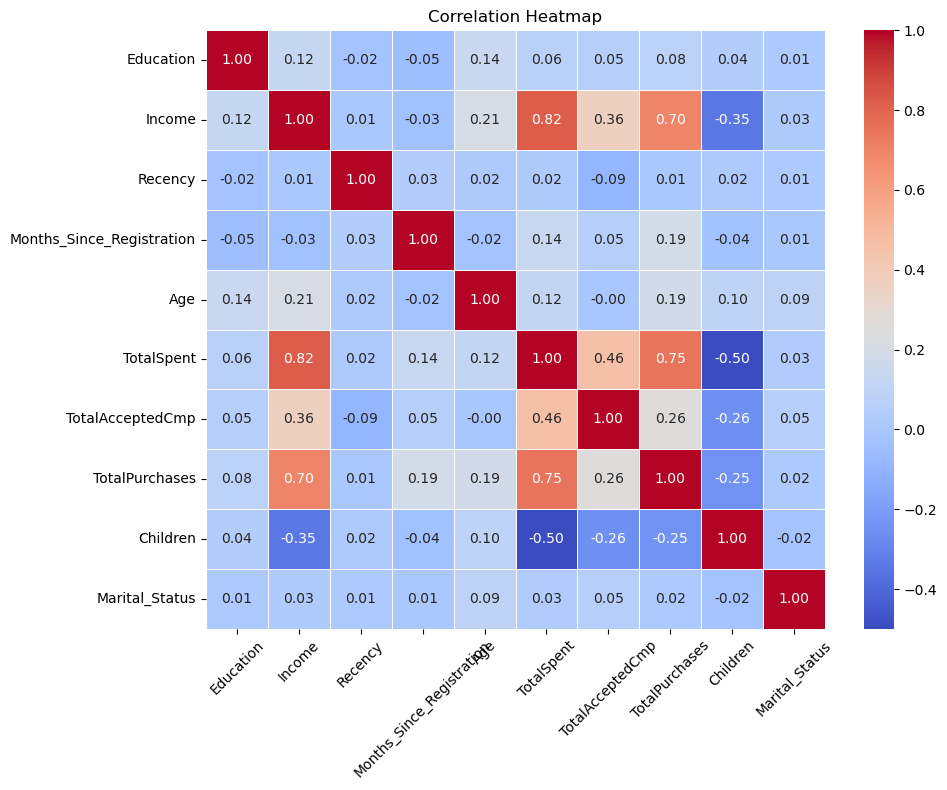

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Education', 'Income', 'Recency', 'Months_Since_Registration', 'Age', 
                      'TotalSpent', 'TotalAcceptedCmp', 'TotalPurchases', 'Children', 'Marital_Status']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()

plt.show()


> As expected, there is a relatively high positive linear correlation between income and the toal amount of purchuses and total money spent.

## standardization
Scaling features before clustering ensures that all variables contribute equally to the analysis. Clustering algorithms like K-Means use distance metrics (e.g., Euclidean distance) to group data points, so large-valued features(like income) can dominate smaller ones if not scaled. By standardizing (scaling to mean 0 and variance 1), we make the features comparable, improving the clustering's accuracy and interpretability.

In [78]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['Education','Income', 'Recency', 'Months_Since_Registration', 'Age', 'TotalSpent', 'TotalAcceptedCmp', 'TotalPurchases', 'Children', 'Marital_Status']
scaled_data = scaler.fit_transform(df[numerical_features])
data_clustering = pd.DataFrame(scaled_data, columns=numerical_features, index=df.index)

# Add non-numerical features to data_clustering
non_numerical_features = df.columns.difference(numerical_features)
data_clustering = pd.concat([data_clustering, df[non_numerical_features]], axis=1)
data_clustering.head()

,Education,Income,Recency,Months_Since_Registration,Age,TotalSpent,TotalAcceptedCmp,TotalPurchases,Children,Marital_Status
0,-0.789177,0.316057,0.305130,1.934933,1.014952,1.681820,0.620381,1.329398,-1.266106,0.752306
1,-0.789177,-0.256151,-0.385965,-1.691958,1.271383,-0.962256,-0.502165,-1.162367,1.394213,0.752306
2,-0.789177,0.969822,-0.800622,-0.137577,0.331137,0.283287,-0.502165,0.804816,-1.266106,-0.121517
3,-0.789177,-1.211836,-0.800622,-1.951022,-1.292925,-0.919019,-0.502165,-0.900076,0.064054,-0.121517
4,1.596608,0.323577,1.549101,-0.785236,-1.036495,-0.305394,-0.502165,0.542525,0.064054,-0.995340


## Clustering
In this project, we will use various clustering algorithms to group customers based on their behaviors. These include KMeans, Birch, Mini KMeans, Agglomerative Clustering, and Mean Shift. For each algorithm, we will evaluate performance with and without dimensionality reduction using PCA.

While we assume we want three clusters for this analysis, we still use the elbow method with KMeans to explore the optimal number of clusters.


In [79]:
number_of_clusters = 3

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

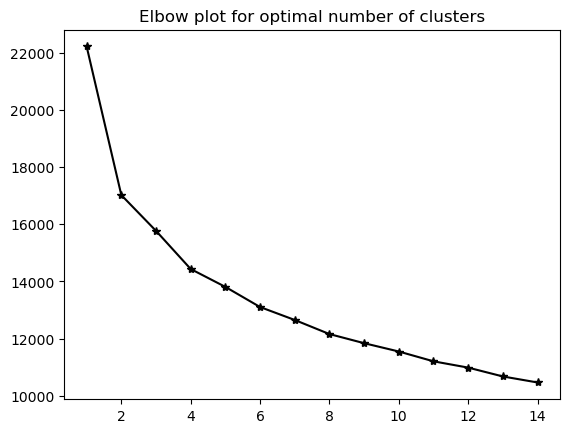

In [80]:
from sklearn.cluster import KMeans

wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_clustering)
    wscc.append(kmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

In [81]:
from sklearn.metrics import silhouette_score
k_means = KMeans(n_clusters=number_of_clusters, random_state=42)
k_means.fit(data_clustering)

score_KMEANS = silhouette_score (data_clustering, k_means.labels_)
print("K-Means Score = ", score_KMEANS)

K-Means Score =  0.17447434119533134


In [83]:
from sklearn.cluster import Birch
from numpy import unique

model_br = Birch(threshold=0.01, n_clusters=number_of_clusters)
model_br.fit(data_clustering)
#
yhat_br = model_br.predict(data_clustering)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

score_br = silhouette_score(data_clustering,labels_br)

print("Score of Birch = ", score_br)

Clusters of Birch [0 1 2]
Score of Birch =  0.16413260843905678


Text(0.5, 1.0, 'Elbow plot for Mini Batch KMeans')

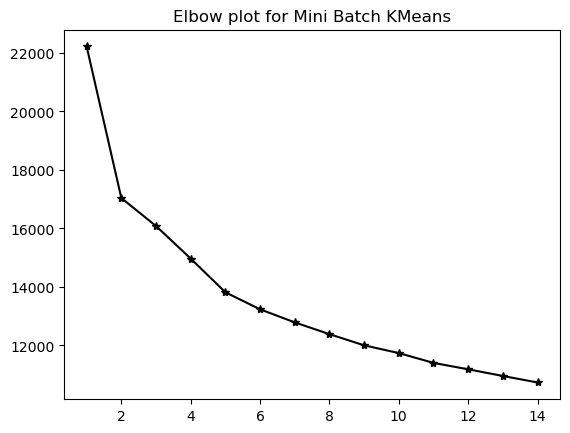

In [86]:
from sklearn.cluster import MiniBatchKMeans

wscc = []
for i in range(1,15):
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(data_clustering)
    wscc.append(mkmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")

In [87]:
from sklearn.cluster import MiniBatchKMeans
from numpy import unique

model_mini = MiniBatchKMeans(n_clusters=number_of_clusters, random_state=0 )
model_mini.fit(data_clustering)
#
yhat_mini = model_mini.predict(data_clustering)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1 2]


In [88]:
score_mini = silhouette_score(data_clustering,labels_mini)

print("Score of Mini Batch KMeans = ", score_mini)

Score of Mini Batch KMeans =  0.15854734319756333


In [89]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters)
agg_labels = agg_clustering.fit_predict(data_clustering)

# Evaluate the clustering using silhouette score
score_AC = silhouette_score(data_clustering, agg_labels)
print("Agglomerative Clustering Silhouette Score = ", score_AC)



Agglomerative Clustering Silhouette Score =  0.16569908964074162


In [90]:
from sklearn.cluster import SpectralClustering

model_sc = SpectralClustering(n_clusters=number_of_clusters)
#
yhat_sc = model_sc.fit_predict(data_clustering)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [0 1 2]


In [91]:
score_MSH = silhouette_score(data_clustering,labels_sc)

print("Score of Mean Shift = ", score_MSH)

Score of Mean Shift =  0.1588404681466967


## PCA
Principal Component Analysis (PCA) is a technique used to reduce the number of features in a dataset while preserving as much of the original information as possible. It transforms the data into new variables, called "principal components," which are combinations of the original features. These components are ordered by how much of the variation in the data they explain, so the first few components typically capture the most important patterns in the data. PCA is often used for simplifying data, visualizing high-dimensional data, and improving the performance of machine learning algorithms.

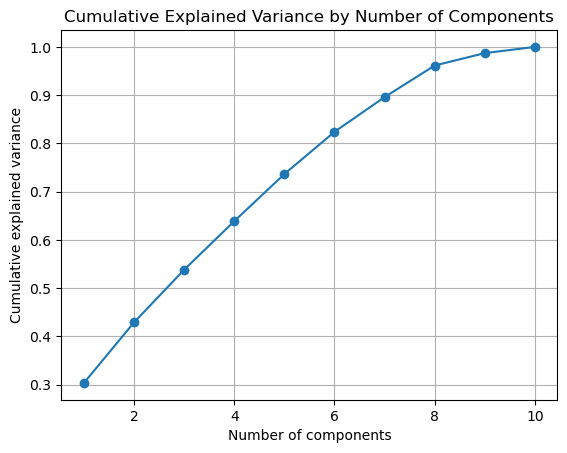

Cumulative explained variance for 1 components: 0.3036
Cumulative explained variance for 2 components: 0.4292
Cumulative explained variance for 3 components: 0.5382
Cumulative explained variance for 4 components: 0.6389
Cumulative explained variance for 5 components: 0.7364
Cumulative explained variance for 6 components: 0.8239
Cumulative explained variance for 7 components: 0.8960
Cumulative explained variance for 8 components: 0.9614
Cumulative explained variance for 9 components: 0.9872
Cumulative explained variance for 10 components: 1.0000


In [92]:
from sklearn.decomposition import PCA


pca = PCA().fit(data_clustering)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid()
plt.show()

# Print cumulative explained variance for each component
for i, value in enumerate(cumulative_explained_variance, start=1):
    print(f"Cumulative explained variance for {i} components: {value:.4f}")


> PCA with 6 components is a good balance between feature reduction and Cumulative explained variance

In [93]:
pca = PCA(n_components=6)
pca.fit(data_clustering)
PCA_df = pd.DataFrame(pca.transform(data_clustering))


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

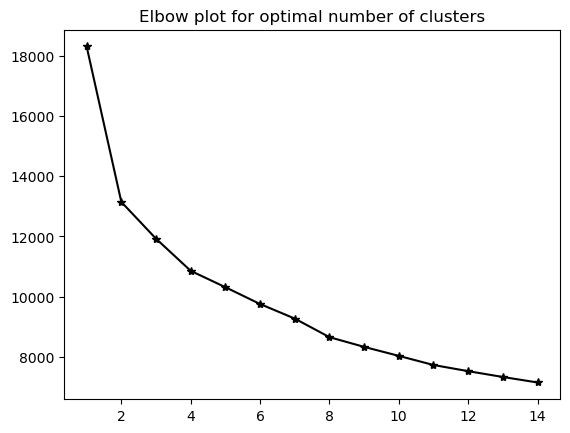

In [94]:
from sklearn.cluster import KMeans

wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(PCA_df)
    wscc.append(kmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

In [95]:
k_means = KMeans(n_clusters=number_of_clusters, random_state=42)
k_means.fit(PCA_df)

k_means_labels = k_means.labels_
score_KMEANS_PCA = silhouette_score (PCA_df, k_means.labels_)
print("K-Means Score = ", score_KMEANS_PCA)

K-Means Score =  0.17801518380581


In [96]:
from sklearn.cluster import Birch


model_br = Birch(threshold=0.01, n_clusters=number_of_clusters)
model_br.fit(PCA_df)
#
yhat_br = model_br.predict(PCA_df)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

score_br_PCA = silhouette_score(data_clustering,labels_br)

print("Score of Birch = ", score_br_PCA)

Clusters of Birch [0 1 2]
Score of Birch =  0.10377723181087405


Text(0.5, 1.0, 'Elbow plot for Mini Batch KMeans')

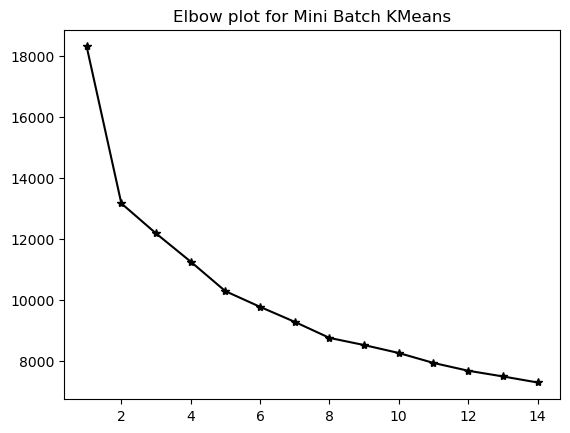

In [97]:
wscc = []
for i in range(1,15):
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(PCA_df)
    wscc.append(mkmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")

In [98]:
from sklearn.cluster import MiniBatchKMeans
from numpy import unique

model_mini = MiniBatchKMeans(n_clusters=number_of_clusters, random_state=0 )
model_mini.fit(PCA_df)
#
yhat_mini = model_mini.predict(PCA_df)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1 2]


In [99]:
score_mini_PCA = silhouette_score(PCA_df,labels_mini)

print("Score of Mini Batch KMeans = ", score_mini_PCA)

Score of Mini Batch KMeans =  0.1822600885853492


In [100]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters)
agg_labels = agg_clustering.fit_predict(PCA_df)

# Evaluate the clustering using silhouette score
score_AC_PCA = silhouette_score(PCA_df, agg_labels)
print("Agglomerative Clustering Silhouette Score = ", score_AC_PCA)



Agglomerative Clustering Silhouette Score =  0.13743083037320192


In [101]:
from sklearn.cluster import SpectralClustering

model_sc = SpectralClustering(n_clusters=number_of_clusters)

yhat_sc = model_sc.fit_predict(PCA_df)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [0 1 2]


In [102]:
score_MSH_PCA = silhouette_score(PCA_df,labels_sc)

print("Score of Mean Shift = ", score_MSH_PCA)

Score of Mean Shift =  0.20903097974714152


## Selecting a model

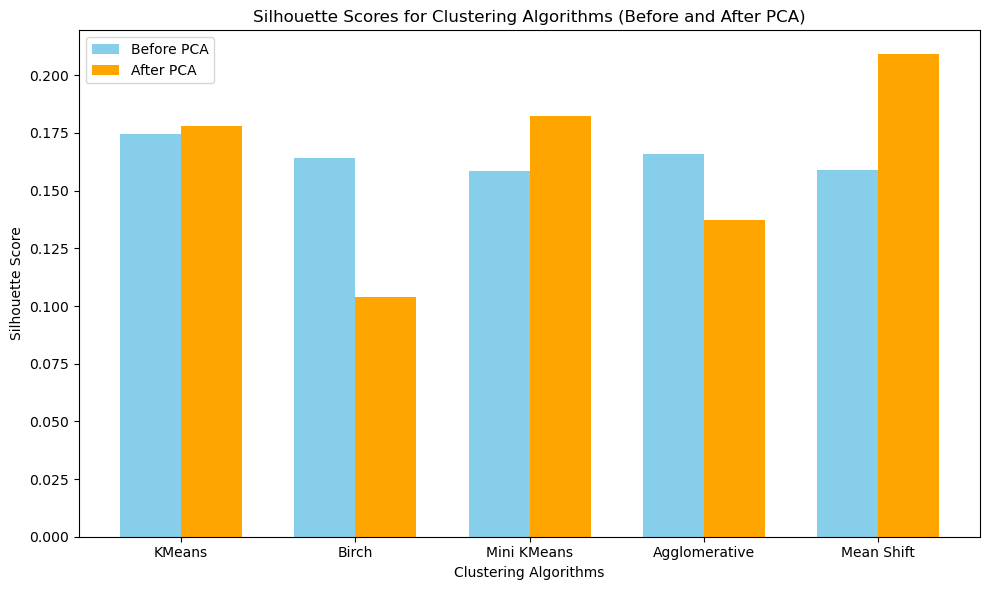

In [103]:
import matplotlib.pyplot as plt
import numpy as np

scores = {
    'KMeans': [score_KMEANS, score_KMEANS_PCA],
    'Birch': [score_br, score_br_PCA],
    'Mini KMeans': [score_mini, score_mini_PCA],
    'Agglomerative': [score_AC, score_AC_PCA],
    'Mean Shift': [score_MSH, score_MSH_PCA]
}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(scores))

# Create bars for before and after PCA scores
for i, (algorithm, score_values) in enumerate(scores.items()):
    ax.bar(index[i] - bar_width/2, score_values[0], bar_width, color='skyblue', label='Before PCA' if i == 0 else "")  # Before PCA
    ax.bar(index[i] + bar_width/2, score_values[1], bar_width, color='orange', label='After PCA' if i == 0 else "")  # After PCA

ax.set_xlabel('Clustering Algorithms')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Clustering Algorithms (Before and After PCA)')
ax.set_xticks(index)
ax.set_xticklabels(scores.keys())

ax.legend()

plt.tight_layout()
plt.show()


> As can be seen, using PCA has generally imporbed the silhouetet score for the chosen agorithms.
> K-Means, Mini K_Menas and Mean Shift have given us better results and Mean shift has the highest score with the highest improvement after applying PCA.
> We use the lables obtained from **Mean Shift** as our selected model

In [104]:
df_with_clusters = df
df_with_clusters['Cluster'] = labels_sc

df_with_clusters = df_with_clusters.join(df_copy[col_drop])
df_with_clusters.head()

,Education,Marital_Status,Income,Recency,Months_Since_Registration,Age,TotalSpent,TotalAcceptedCmp,TotalPurchases,Children,...,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Dt_Customer,Complain,ID
0,1,2,58138.0,58,45,58,1617,1,25,0,...,635,88,546,172,88,88,1957,2012-04-09,0,5524
1,1,2,46344.0,38,17,61,27,0,6,2,...,11,1,6,2,1,6,1954,2014-08-03,0,2174
2,1,1,71613.0,26,29,50,776,0,21,0,...,426,49,127,111,21,42,1965,2013-08-21,0,4141
3,1,1,26646.0,26,15,31,53,0,8,1,...,11,4,20,10,3,5,1984,2014-10-02,0,6182
4,3,0,58293.0,94,24,34,422,0,19,1,...,173,43,118,46,27,15,1981,2014-01-19,0,5324


## Visualizing differnet features based on clusters
> Now that we have selected a model and obtained the lables of clusters for each datapoint, we esplore the differneces between these clusters to be able to have a good understanding of their behaviour

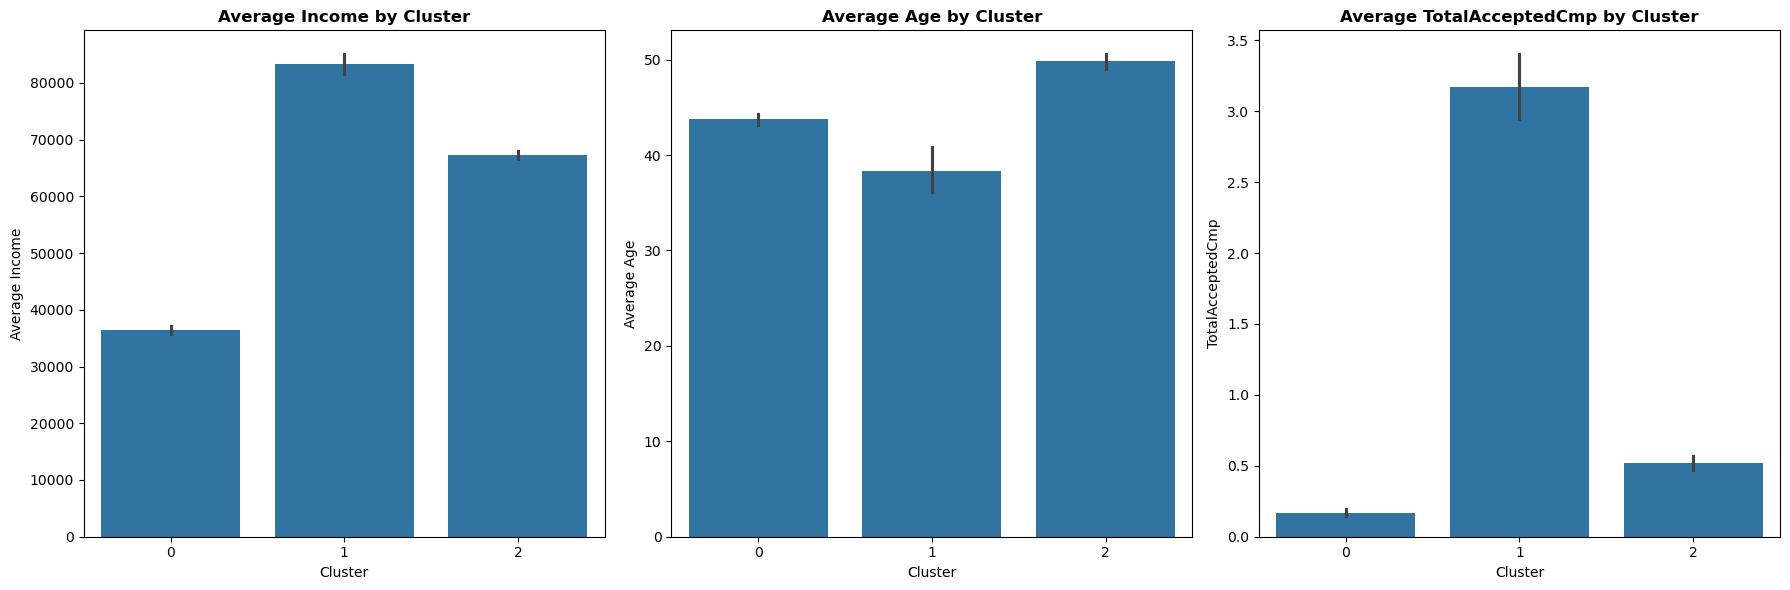

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average income by cluster
sns.barplot(x='Cluster', y='Income', data=df_with_clusters, ax=axes[0])
axes[0].set_title('Average Income by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Income')

# Plot average age by cluster
sns.barplot(x='Cluster', y='Age', data=df_with_clusters, ax=axes[1])
axes[1].set_title('Average Age by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Age')

# Plot average TotalAcceptedCmp by cluster
sns.barplot(x='Cluster', y='TotalAcceptedCmp', data=df_with_clusters, ax=axes[2])
axes[2].set_title('Average TotalAcceptedCmp by Cluster', fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('TotalAcceptedCmp')

plt.tight_layout()
plt.show()


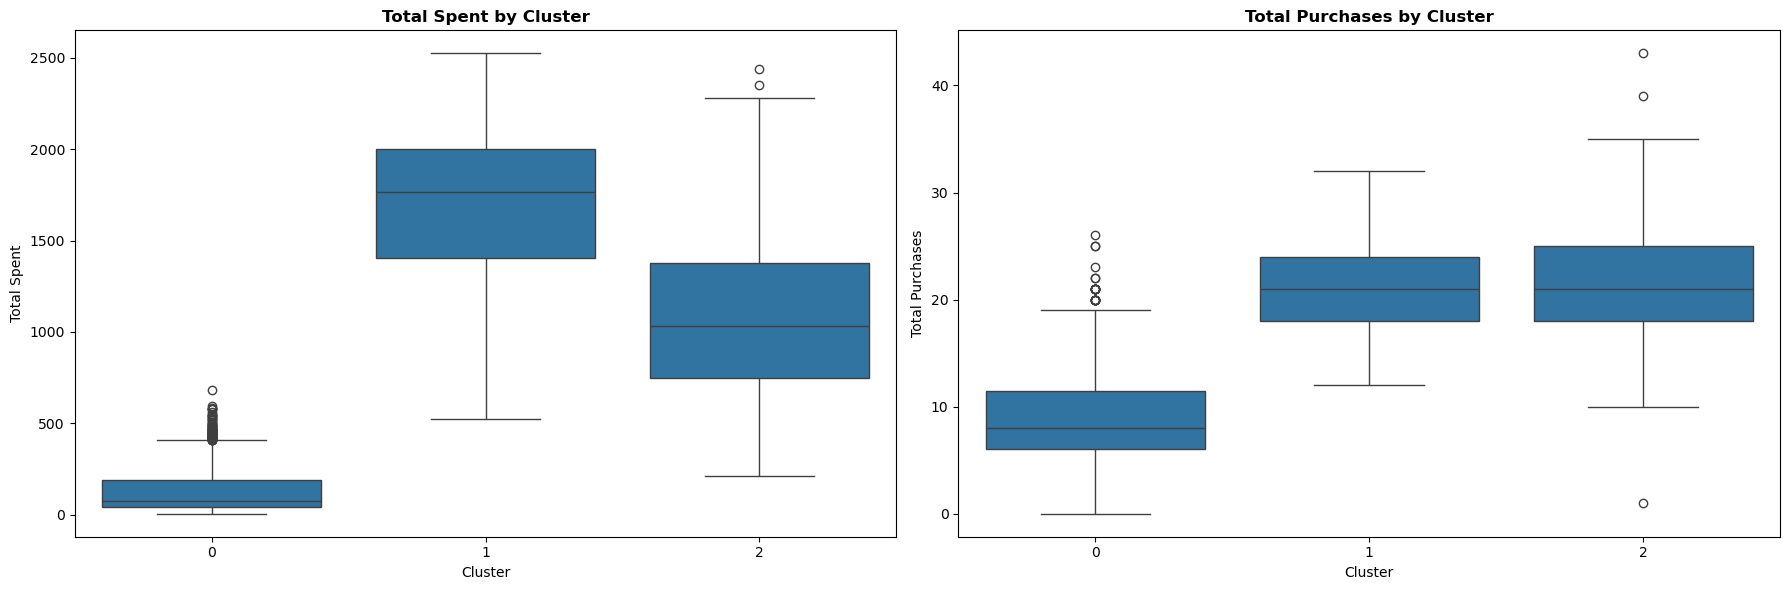

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for TotalSpent by Cluster
sns.boxplot(x='Cluster', y='TotalSpent', data=df_with_clusters, ax=axes[0])
axes[0].set_title('Total Spent by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Total Spent')

# Box plot for TotalPurchases by Cluster
sns.boxplot(x='Cluster', y='TotalPurchases', data=df_with_clusters, ax=axes[1])
axes[1].set_title('Total Purchases by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Total Purchases')

plt.tight_layout()
plt.show()


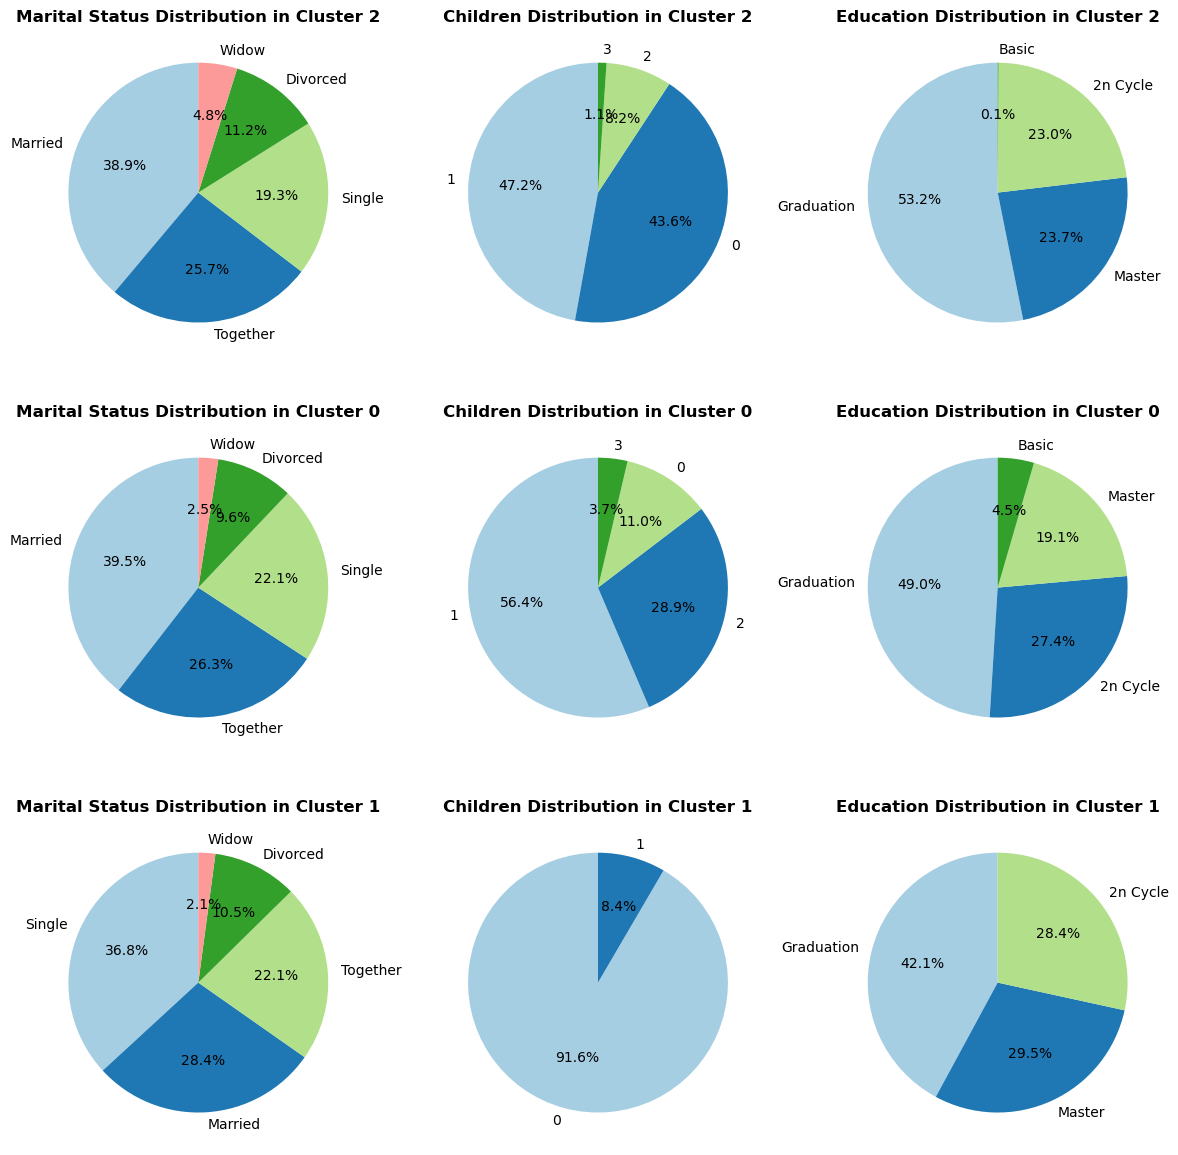

In [107]:
import matplotlib.pyplot as plt

# Define the marital status legend
marital_status_legend = {
    0: "Married",
    1: "Together",
    2: "Single",
    3: "Divorced",
    4: "Widow"
}

# Define the education level legend
education_legend = {
    0: "Basic",
    1: "Graduation",
    2: "2n Cycle",
    3: "Master",
    4: "PhD"
}

clusters = df_with_clusters['Cluster'].unique()

# Set up subplots (3 charts per row: Marital Status, Children, Education)
fig, axes = plt.subplots(len(clusters), 3, figsize=(12, len(clusters) * 4))

# Loop through each cluster
for i, cluster in enumerate(clusters):

    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    
    # Marital Status Pie Chart
    marital_status_counts = cluster_data['Marital_Status'].value_counts(normalize=True)
    marital_status_counts.index = marital_status_counts.index.map(marital_status_legend)
    axes[i, 0].pie(
        marital_status_counts, 
        labels=marital_status_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors[:len(marital_status_counts)]
    )
    axes[i, 0].set_title(f'Marital Status Distribution in Cluster {cluster}', fontweight='bold')
    
    # Children Pie Chart
    children_counts = cluster_data['Children'].value_counts(normalize=True)
    axes[i, 1].pie(
        children_counts, 
        labels=children_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors[:len(children_counts)]
    )
    axes[i, 1].set_title(f'Children Distribution in Cluster {cluster}', fontweight='bold')
    
    # Education Pie Chart
    education_counts = cluster_data['Education'].value_counts(normalize=True)
    education_counts.index = education_counts.index.map(education_legend)
    axes[i, 2].pie(
        education_counts, 
        labels=education_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors[:len(education_counts)]
    )
    axes[i, 2].set_title(f'Education Distribution in Cluster {cluster}', fontweight='bold')

plt.tight_layout()
plt.show()


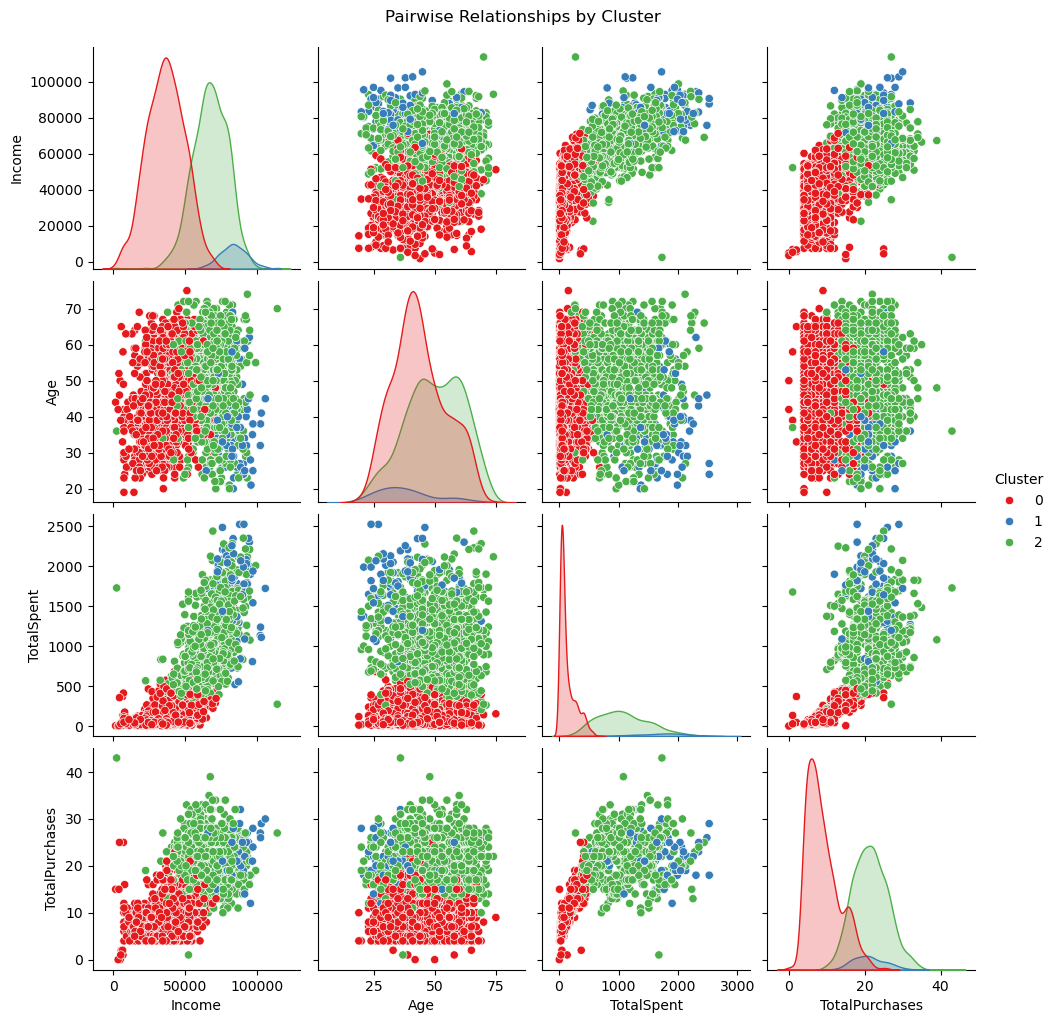

In [108]:
sns.pairplot(df_with_clusters[['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('Pairwise Relationships by Cluster', y=1.02)
plt.show()


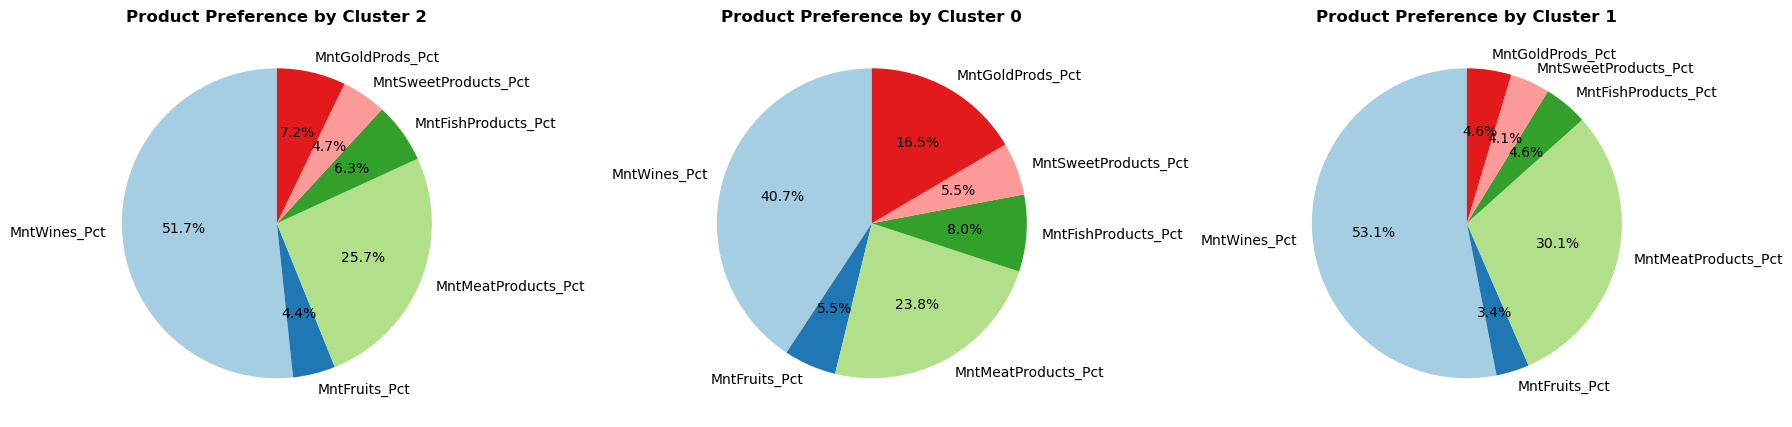

In [109]:
import matplotlib.pyplot as plt

product_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Normalize each product feature to the percentage of total purchases for each individual
for feature in product_features:
    df_with_clusters[feature + '_Pct'] = df_with_clusters[feature] / df_with_clusters['TotalSpent'] * 100

clusters = df_with_clusters['Cluster'].unique()

fig, axes = plt.subplots(1, len(clusters), figsize=(len(clusters) * 6, 6))

for i, cluster in enumerate(clusters):
    # Data for current cluster
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

    # Calculate the average percentage of each product feature in the current cluster
    avg_pct = cluster_data[[feature + '_Pct' for feature in product_features]].mean()
    
    # Plot Pie Chart
    axes[i].pie(
        avg_pct, 
        labels=avg_pct.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors[:len(avg_pct)]
    )
    axes[i].set_title(f'Product Preference by Cluster {cluster}', fontweight='bold')

plt.tight_layout()
plt.show()


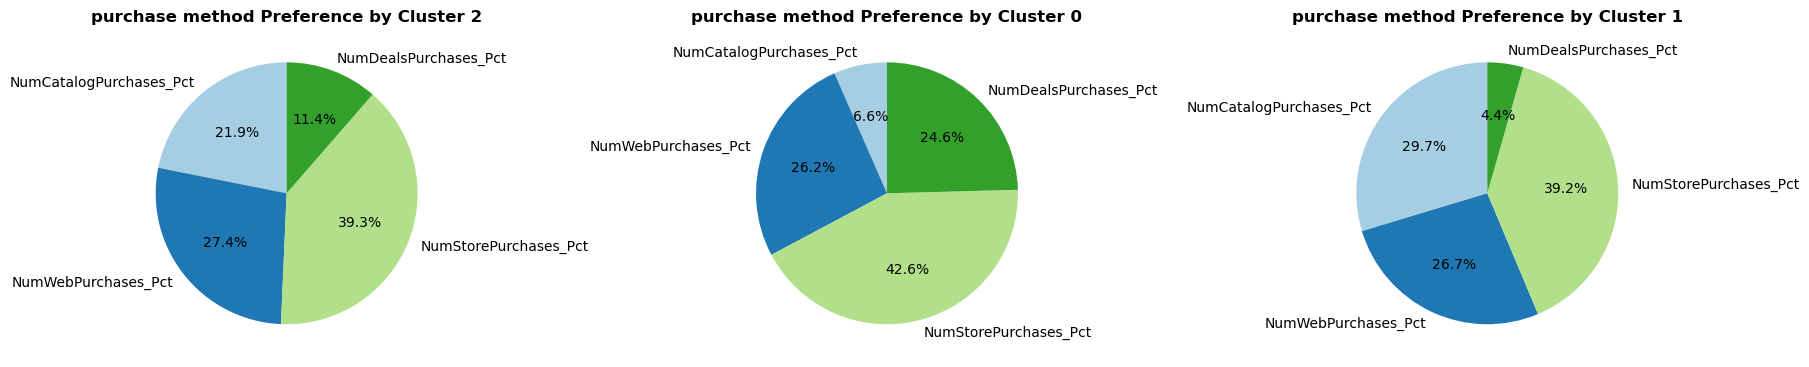

In [110]:
import matplotlib.pyplot as plt
purchase_method = ['NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Normalize each  purchase method to the percentage of total purchases for each individual
for method in purchase_method:
    df_with_clusters[method + '_Pct'] = df_with_clusters[method] / df_with_clusters['TotalPurchases'] * 100

clusters = df_with_clusters['Cluster'].unique()

fig, axes = plt.subplots(1, len(clusters), figsize=(len(clusters) * 6, 6))

for i, cluster in enumerate(clusters):
    # Data for current cluster
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

    # Calculate the average percentage of each product feature in the current cluster
    avg_pct = cluster_data[[method + '_Pct' for method in purchase_method]].mean()
    
    # Plot Pie Chart
    axes[i].pie(
        avg_pct, 
        labels=avg_pct.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors[:len(avg_pct)]
    )
    axes[i].set_title(f'purchase method Preference by Cluster {cluster}', fontweight='bold')

plt.tight_layout()
plt.show()


## Observations


### Cluster 0 (Low income, Family-oriented)

    Income: This group has the lowest income among all clusters, indicating a potential segment with constrained financial resources.
    Age: The average age is middle-aged, suggesting that this cluster consists of people in their prime working years, but not necessarily young professionals.
    Campaign Response: This group shows very low campaign engagement, with very few offers accepted. This could be a challenge if you're targeting them with promotions.
    Spending: Low overall spending, possibly due to income constraints, but they are still active consumers in specific product categories.
    Family Situation: This cluster stands out for having the highest number of children in households, with some families having as many as three children.
    Education: The least educated group, with a portion having only basic high school education.
    Product Preferences:
        - They spend mostly on gold, fish, and sweets, suggesting.
        - Wine and meat are less popular compared to other clusters.
        - They have a preference for store purchases and are more likely to purchase on deals, indicating price sensitivity.
        - Catalog purchases are the lowest, which could indicate they don’t engage as much with catalog-based shopping.

### Cluster 1 (High income, Young professionals)

    Income: This is the wealthiest group, which could signify professionals or high-income individuals.
    Age: The youngest cluster, likely consisting of young professionals or individuals who are in the early stages of their careers.
    Campaign Response: This group has the highest engagement with campaigns, suggesting that they are responsive to promotional offers.
    Spending: High spenders overall, likely driven by their higher income, which translates into a broader range of purchasing power.
    Family Situation: Most people in this cluster don’t have children, and only a small number have one child, indicating a lack of family-oriented consumers.
    Education: This is the most educated group, with the highest amount of individuals holding master's degrees. This could indicate professionals with higher education levels.
    Product Preferences:
        - They prefer wine and meat, suggesting a taste for more premium products.
        - Less interested in fish, gold, and sweets.
        - Catalog purchases are the highest, which could point to a preference for online shopping or subscriptions.
        - They purchase fewer items on deals, suggesting they might be less price-sensitive due to higher disposable income.

### Cluster 2 (Mid income, Older demographic)

    Income: This cluster has a middle-income level, suggesting that it represents a more balanced or typical consumer segment.
    Age: The oldest group, consisting of individuals in their late 40s or older, potentially retirees or people nearing retirement.
    Campaign Response: Low engagement with offers, indicating that promotions and discounts may not be as attractive or relevant to this group.
    Spending: Mid-level spenders, meaning they may not be as financially comfortable as Cluster 1 but still have moderate purchasing power.
    Family Situation: This group has a higher percentage of widows and divorced individuals compared to other clusters.
    Education: The group is well-educated, with a mix of graduated and some individuals with master's or bachelor's degrees.
    Product Preferences:
        - Their preferences are balanced between Cluster 0 and Cluster 1 products.
        - Wine and meat are more popular than in Cluster 0, but not as strongly as in Cluster 1.
        - Fish and gold are less popular compared to Cluster 0, but their purchase behavior is closer to Cluster 1 on many products.
        - Their total product purchases are somewhere between Cluster 0 and Cluster 1, indicating more balanced consumption habits.